In [0]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import data from csv files into dataframes 
false_data = pd.read_csv("trueJavier.csv", encoding = 'latin-1')
true_data = pd.read_csv("fakeJavier.csv", encoding = 'latin-1')

In [0]:
# Combine both dataframes into one
spoofed_data = false_data.append(true_data, ignore_index=True)
spoofed_data.columns

Index(['YYYY-MM-DD', 'HH:MM:SS (UTC)', 'speed over ground (Knots)',
       'magnetic variation', 'latitude', 'lat direction', 'longitude',
       'lon direction', 'sat tracked', 'horizontal dilution', 'altitude',
       'alt units', 'height of geoid', 'geoid units', 'sat in view',
       'num. nmeas', 'SNR', 'label'],
      dtype='object')

In [0]:
display(spoofed_data.head(n = 10))

In [0]:
spoofed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YYYY-MM-DD                 2652 non-null   object 
 1   HH:MM:SS (UTC)             2652 non-null   object 
 2   speed over ground (Knots)  2369 non-null   float64
 3   magnetic variation         0 non-null      float64
 4   latitude                   2369 non-null   float64
 5   lat direction              2369 non-null   object 
 6   longitude                  2369 non-null   float64
 7   lon direction              2369 non-null   object 
 8   sat tracked                2652 non-null   int64  
 9   horizontal dilution        2652 non-null   float64
 10  altitude                   2369 non-null   float64
 11  alt units                  2369 non-null   object 
 12  height of geoid            2369 non-null   float64
 13  geoid units                2369 non-null   objec

In [0]:
# remove rows with missing data 
spoofed_data = spoofed_data[spoofed_data["sat tracked"] != 0]
spoofed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2374 entries, 0 to 2643
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YYYY-MM-DD                 2374 non-null   object 
 1   HH:MM:SS (UTC)             2374 non-null   object 
 2   speed over ground (Knots)  2369 non-null   float64
 3   magnetic variation         0 non-null      float64
 4   latitude                   2369 non-null   float64
 5   lat direction              2369 non-null   object 
 6   longitude                  2369 non-null   float64
 7   lon direction              2369 non-null   object 
 8   sat tracked                2374 non-null   int64  
 9   horizontal dilution        2374 non-null   float64
 10  altitude                   2369 non-null   float64
 11  alt units                  2369 non-null   object 
 12  height of geoid            2369 non-null   float64
 13  geoid units                2369 non-null   objec

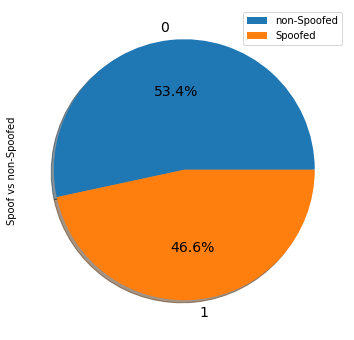

In [0]:
# Display what percentage of our data is spoofed and non-spoofed 
spoofed_data["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), fontsize=14, autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spoof vs non-Spoofed")
leg = plt.legend( loc = 'upper right')
plt.legend(["non-Spoofed", "Spoofed"])
plt.show()

In [0]:
from ast import literal_eval
import statistics as stats

def computeAverage(snrValues):
  # convert the string to a list of values
  snrValues = literal_eval(snrValues)
  # type cast each value to an integer
  snrValues = [int(val) for val in snrValues if val is not '']
  snrValues = np.asarray(snrValues)
  # return the average SNR value in the list
  return np.average(snrValues)

def computeStd(snrValues):
  # convert the string to a list of values
  snrValues = literal_eval(snrValues)
  # type cast each value to an integer
  snrValues = [int(val) for val in snrValues if val is not '']
  snrValues = np.asarray(snrValues)
  # return the std SNR value of the list
  return np.std(snrValues)

# print(computeAverage(spoofed_data["SNR"][1]))
# Create two new rows 'average SNR' and 'SNR std' 
spoofed_data["average SNR"] = spoofed_data["SNR"].apply(computeAverage)
spoofed_data["SNR std"] = spoofed_data["SNR"].apply(computeStd)

In [0]:
spoofed_data.columns

Index(['YYYY-MM-DD', 'HH:MM:SS (UTC)', 'speed over ground (Knots)',
       'magnetic variation', 'latitude', 'lat direction', 'longitude',
       'lon direction', 'sat tracked', 'horizontal dilution', 'altitude',
       'alt units', 'height of geoid', 'geoid units', 'sat in view',
       'num. nmeas', 'SNR', 'label', 'average SNR', 'SNR std'],
      dtype='object')

In [0]:
# spoofed_data["latitude"].describe()
spoofed_data[spoofed_data["label"] == 1]["SNR std"].describe()

count    1107.000000
mean        4.962426
std         2.666736
min         2.915476
25%         3.324990
50%         3.435921
75%         6.654681
max        17.903939
Name: SNR std, dtype: float64

In [0]:
spoofed_data[spoofed_data["label"] == 0]["SNR std"].describe()

count    1267.000000
mean        5.611109
std         1.157748
min         2.232571
25%         4.993746
50%         5.583328
75%         6.276020
max         9.654526
Name: SNR std, dtype: float64

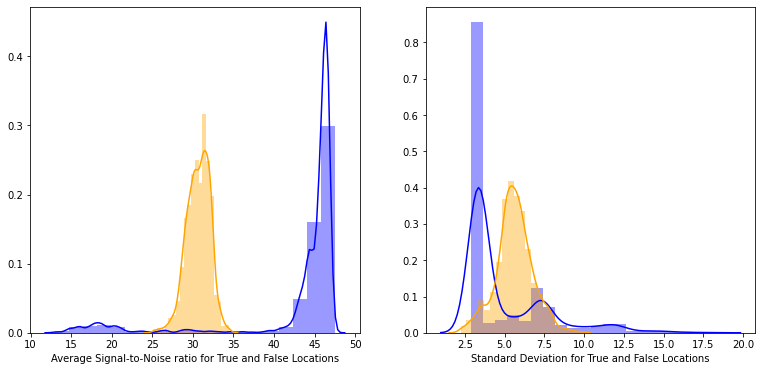

In [0]:
# f, ax = plt.subplots(2, 1, figsize = (6, 10))
f, ax = plt.subplots(1, 2, figsize=(13,6))

sns.distplot(spoofed_data[spoofed_data["label"] == 1]["average SNR"], color="blue", bins = 20, ax = ax[0])
sns.distplot(spoofed_data[spoofed_data["label"] == 0]["average SNR"], color="orange", bins = 20, ax = ax[0])
ax[0].set_xlabel("Average Signal-to-Noise ratio for True and False Locations")

sns.distplot(spoofed_data[spoofed_data["label"] == 1]["SNR std"], color="blue", bins = 20, ax = ax[1])
sns.distplot(spoofed_data[spoofed_data["label"] == 0]["SNR std"], color="orange", bins = 20, ax = ax[1])
ax[1].set_xlabel("Standard Deviation for True and False Locations")

# sns.scatterplot(x="average SNR", y="SNR std", hue="label", palette=dict({0: "orange", 1: "blue"}), alpha=0.45, data=spoofed_data, ax=ax[2])

plt.show()

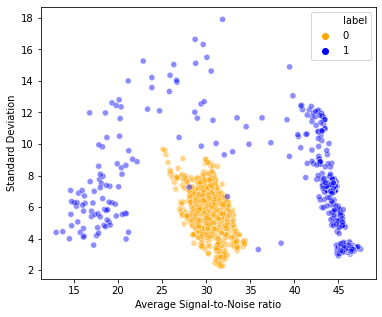

In [0]:
f, ax = plt.subplots(1, 1, figsize = (6, 5))
sns.scatterplot(x="average SNR", y="SNR std", hue="label", palette=dict({0: "orange", 1: "blue"}), alpha=0.45, data=spoofed_data)
ax.set_xlabel("Average Signal-to-Noise ratio")
ax.set_ylabel("Standard Deviation")

plt.show()

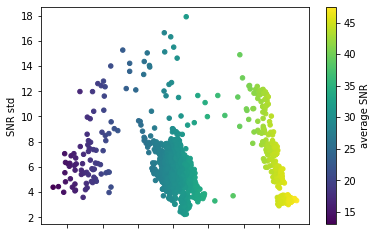

In [0]:
ax = spoofed_data.plot.scatter(x="average SNR",y="SNR std",c="average SNR",colormap="viridis")
# ax = sns.scatterplot(x="average SNR", y="SNR std", hue="average SNR",data=spoofed_data)
# ax = sns.scatterplot(x="average SNR", y="SNR std", hue="SNR std",data=spoofed_data)
# ax = sns.scatterplot(x="average SNR", y="SNR std", hue="label",data=spoofed_data)

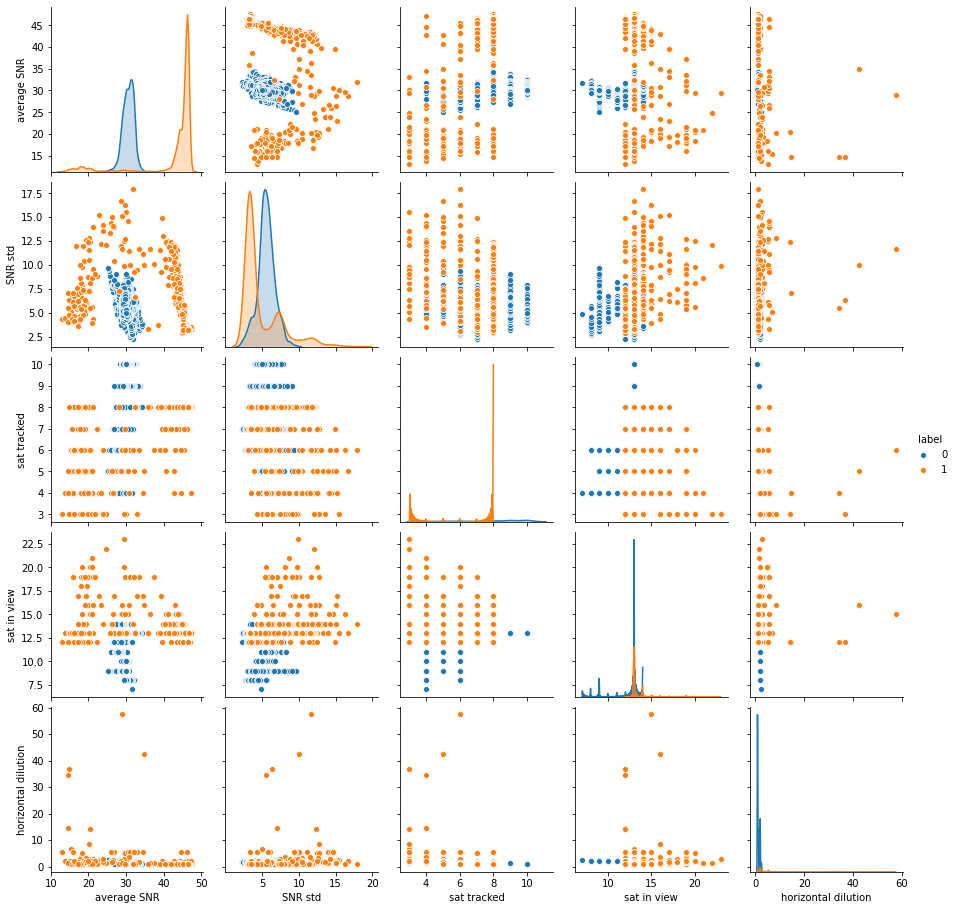

In [0]:
sns.pairplot(spoofed_data[["label","average SNR", "SNR std", "sat tracked", "sat in view", "horizontal dilution"]], hue="label", height=2.5);

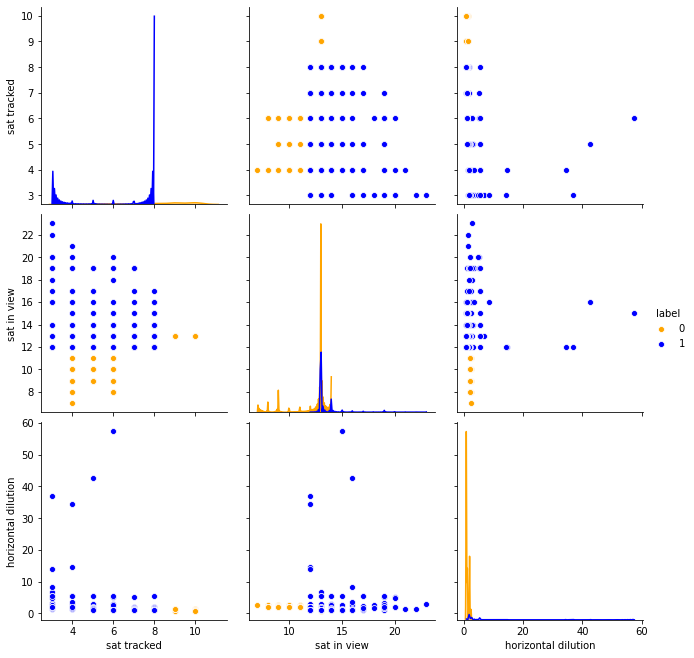

In [0]:
sns.pairplot(spoofed_data[["label", "sat tracked", "sat in view", "horizontal dilution"]], hue="label", palette=dict({0: "orange", 1: "blue"}), height=3.0);

In [0]:
# references for plotting 
# https://seaborn.pydata.org/tutorial/axis_grids.html
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

In [0]:
# Split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spoofed_data[["average SNR", "SNR std"]], spoofed_data[["label"]], test_size=0.30, random_state=42)

print("The size of total samples:", len(spoofed_data["label"]))
print("The size of trainng samples:", X_train.shape)
print("The size of testing samples:", X_test.shape)
print("The size of spoofed data in training samples:", len(y_train[y_train["label"] == 1]))
print("The size of non-spoofed data in training samples:", len(y_train[y_train["label"] == 0]))

The size of total samples: 2374
The size of trainng samples: (1661, 2)
The size of testing samples: (713, 2)
The size of spoofed data in training samples: 777
The size of non-spoofed data in training samples: 884


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Testing one sample from the testing set
print(knn.predict([X_test.iloc[6]]))
print(knn.predict_proba([X_test.iloc[6]]))
print(y_test.iloc[6])

[1]
[[0. 1.]]
label    1
Name: 2449, dtype: int64


In [0]:
print("Mean accuracy on the given test data and labels:", knn.score(X_test, y_test))
print("Parameters for this estimator:\n", knn.get_params())

Mean accuracy on the given test data and labels: 0.9971949509116409
Parameters for this estimator:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


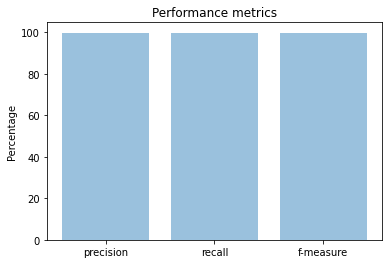

In [40]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = knn.predict(X_test)
performance = precision_recall_fscore_support(y_test, y_pred, average='micro')
score = [x*100 for x in performance[0:3]]

objects = ('precision', 'recall', 'f-measure')
y_pos = np.arange(len(objects))

plt.bar(y_pos, score, align='center', alpha=0.45)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Performance metrics')

plt.show()

In [0]:
type(performance)
performance[0:3]

(0.9971949509116409, 0.9971949509116409, 0.9971949509116409)

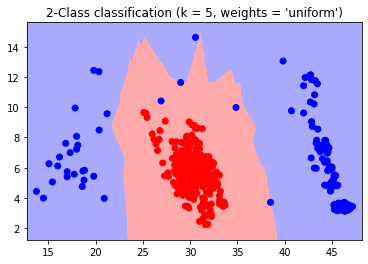

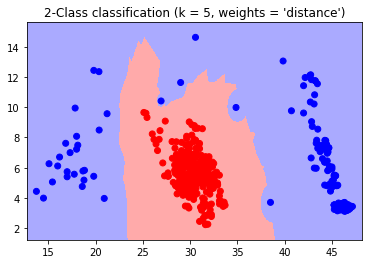

In [0]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5
# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = X_test.to_numpy()
X = X[:, :2]

y = y_test.to_numpy()
y.resize((713, ))

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()